<strong><div style="text-align: center; font-size: 28px;">
Аналитика данных компании "Gectaro"
</div><strong>

**Описание данных.**<br>
"Gectaro" – облачный сервис для автоматизации управления строительством и ремонтом (https://gectaro.com/).
Компания продает софт с платной подпиской в сегменте B2B, предназначенный для управления процессами в сфере строительства и ремонта.
Основная проблема – это уход из сервиса большого количества подписчиков, партнеров и не продление подписки.

**Цель проекта.**<br>
Проанализировать имеющиеся данные, составить портреты наиболее типичных клиентов, разобраться в причинах оттока клиентов, предложить решения по их минимизации. Для этого предлагается определить ключевые признаки для компаний, наличие которых (или их появление) влияет на отмену (отсутствие оплаты) подписки.

**Задачи:**<br>
1. Проанализировать имеющиеся данные.
2. Составить портреты наиболее типичных клиентов (сегментировать по различным признакам). При необходимости провести RFM-анализ.
3. Сформулировать и проверить гипотезы, основываясь на имеющихся признаках.
4. Разобраться в причинах оттока клиентов, предложить решения по уменьшению оттока.
5. Сформулировать выводы по полученным результатам, подготовить презентацию.

In [1]:
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

**Загрузка данных.**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import datetime
import math as mth
import plotly.express as px
import plotly.graph_objects as pg
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
from plotly import graph_objects as go
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [3]:
def info(df):
    print("Таблица:")
    display(df.head())
    print("------------------------------------------------------------------------------------------------")
    print("Информация:")
    display(df.info())
    print("------------------------------------------------------------------------------------------------")
    print("Пропуски:")
    display(df.isna().sum())
    print("------------------------------------------------------------------------------------------------")
    print("Дубликаты:")
    display(df.duplicated().sum())

In [4]:
activities = pd.read_csv("C:\\Проект3\\datasets_гектаро\\activities.csv")
billing = pd.read_csv("C:\\Проект3\\datasets_гектаро\\billing.csv")
companies = pd.read_csv("C:\\Проект3\\datasets_гектаро\\companies.csv")
people = pd.read_csv("C:\\Проект3\\datasets_гектаро\\people.csv")

In [5]:
info(activities)

Таблица:


,Unnamed: 0,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
0,0,1,2019-09-01 00:00:00+00:00,1.0,0.0,0.0,7.0,0.0,0.0
1,1,1,2019-12-01 00:00:00+00:00,1.0,0.0,0.0,2.0,1.0,0.0
2,2,1,2020-04-01 00:00:00+00:00,4.0,1.0,0.0,1.0,6.0,0.0
3,3,1,2020-07-01 00:00:00+00:00,1.0,7.0,3.0,5.0,0.0,0.0
4,4,21,2020-01-01 00:00:00+00:00,3.0,0.0,0.0,1.0,0.0,0.0


------------------------------------------------------------------------------------------------
Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     6316 non-null   int64  
 1   company_id                     6316 non-null   int64  
 2   month                          6316 non-null   object 
 3   company-month-billing          6316 non-null   float64
 4   company-month-stocks           6316 non-null   float64
 5   company-month-backups          6316 non-null   float64
 6   company-month-projects         6316 non-null   float64
 7   company-month-contractors      6316 non-null   float64
 8   company-month-resource_orders  6316 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 444.2+ KB


None

------------------------------------------------------------------------------------------------
Пропуски:


Unnamed: 0                       0
company_id                       0
month                            0
company-month-billing            0
company-month-stocks             0
company-month-backups            0
company-month-projects           0
company-month-contractors        0
company-month-resource_orders    0
dtype: int64

------------------------------------------------------------------------------------------------
Дубликаты:


0

Данные чистые. Явных дубликатов и пропусков нет. В столбце с датой строковый формат.

In [6]:
info(billing)

Таблица:


,Unnamed: 0.1,Unnamed: 0,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
0,4,4,3050,567,512,3,1640153302,False,1608617302,1608617302,12.0,NaN,NaN
1,6,6,3051,2861,2474,7,1640131200,True,1608626162,1608626181,23.0,NaN,1.608626e+09
2,16,16,3059,1902,1645,2,1616577484,False,1608801484,1608801484,6.0,NaN,NaN
3,18,18,3065,2352,2035,7,1643500799,False,1608883175,1608883175,23.0,NaN,NaN
4,24,24,3062,1074,926,3,1611964800,True,1608814072,1608899674,9.0,NaN,1.609200e+09


------------------------------------------------------------------------------------------------
Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0.1             3480 non-null   int64  
 1   Unnamed: 0               3480 non-null   int64  
 2   id                       3480 non-null   int64  
 3   user_id                  3480 non-null   int64  
 4   company_id               3480 non-null   int64  
 5   billing_tariff_id        3480 non-null   int64  
 6   payed_until              3480 non-null   int64  
 7   is_payed                 3480 non-null   bool   
 8   created_at               3480 non-null   int64  
 9   updated_at               3480 non-null   int64  
 10  billing_tariff_price_id  3480 non-null   float64
 11  comment                  745 non-null    object 
 12  pay_date               

None

------------------------------------------------------------------------------------------------
Пропуски:


Unnamed: 0.1                  0
Unnamed: 0                    0
id                            0
user_id                       0
company_id                    0
billing_tariff_id             0
payed_until                   0
is_payed                      0
created_at                    0
updated_at                    0
billing_tariff_price_id       0
comment                    2735
pay_date                   2372
dtype: int64

------------------------------------------------------------------------------------------------
Дубликаты:


0

Данные также чистые. Явных дубликтов нет. В стобцах "comment" и "pay_date" есть большое количество пропусков, которые составляют 78,6% от всего количества строк. Учитывая такое большое количество пропусков, удалять их не целесообразно. В столбцах с датами числовой формат.

In [7]:
info(companies)

Таблица:


,Unnamed: 0,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
0,19,514,-,1.0,1571316635,1670298314,4.0,True
1,57,383,Строительство,2.0,1564142565,1676550050,7.0,False
2,69,495,-,1.0,1570535695,1598281714,2.0,False
3,75,724,-,1.0,1579514393,1670298294,4.0,True
4,99,471,-,1.0,1569328017,1670298360,7.0,True


------------------------------------------------------------------------------------------------
Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               723 non-null    int64  
 1   id                       723 non-null    int64  
 2   working_direction        720 non-null    object 
 3   employer_count_interval  723 non-null    float64
 4   created_at               723 non-null    int64  
 5   updated_at               723 non-null    int64  
 6   billing_tariff_id        716 non-null    float64
 7   billing_is_over          723 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 40.4+ KB


None

------------------------------------------------------------------------------------------------
Пропуски:


Unnamed: 0                 0
id                         0
working_direction          3
employer_count_interval    0
created_at                 0
updated_at                 0
billing_tariff_id          7
billing_is_over            0
dtype: int64

------------------------------------------------------------------------------------------------
Дубликаты:


0

Данные, в целом, чистые. Явных дубликатов нет. В столбце "billing_tariff_id" есть 7 пропусков. В случае необходимости, их можно будет удалить. В столбцах с датами также чиловой формат.

In [8]:
info(people)

Таблица:


,Unnamed: 0,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
0,2,6601,495,NaN,7133,1570535962,1570535962,True,1.594067e+09
1,6,7025,1,NaN,1,1594120484,1594120484,True,1.594120e+09
2,7,7165,1255,1734.0,18085,1595438102,1595439391,True,1.633960e+09
3,10,7130,1470,1703.0,1,1595234824,1595234824,False,NaN
4,17,7163,1492,1731.0,1,1595429211,1598540644,True,1.620195e+09


------------------------------------------------------------------------------------------------
Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5095 non-null   int64  
 1   id          5095 non-null   int64  
 2   company_id  5095 non-null   int64  
 3   user_id     3813 non-null   float64
 4   role_id     5095 non-null   int64  
 5   created_at  5095 non-null   int64  
 6   updated_at  5095 non-null   int64  
 7   is_deleted  5095 non-null   bool   
 8   deleted_at  2180 non-null   float64
dtypes: bool(1), float64(2), int64(6)
memory usage: 323.5 KB


None

------------------------------------------------------------------------------------------------
Пропуски:


Unnamed: 0       0
id               0
company_id       0
user_id       1282
role_id          0
created_at       0
updated_at       0
is_deleted       0
deleted_at    2915
dtype: int64

------------------------------------------------------------------------------------------------
Дубликаты:


0

Данные чистые. Явных дубликатов нет. В столбцах "user_id" и "deleted_at" есть значительное количество пропусков. Поскольку их много, то удалять их не будем. В столбце с датами числовой формат.

**Предобработка данных.**

В таблицах есть столбцы со старым индексом. Удалим их.

In [9]:
activities = activities.drop("Unnamed: 0", axis = 1)

In [10]:
activities.head()

,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
0,1,2019-09-01 00:00:00+00:00,1.0,0.0,0.0,7.0,0.0,0.0
1,1,2019-12-01 00:00:00+00:00,1.0,0.0,0.0,2.0,1.0,0.0
2,1,2020-04-01 00:00:00+00:00,4.0,1.0,0.0,1.0,6.0,0.0
3,1,2020-07-01 00:00:00+00:00,1.0,7.0,3.0,5.0,0.0,0.0
4,21,2020-01-01 00:00:00+00:00,3.0,0.0,0.0,1.0,0.0,0.0


In [11]:
billing = billing.drop(["Unnamed: 0.1", "Unnamed: 0"], axis = 1)

In [12]:
billing.head()

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
0,3050,567,512,3,1640153302,False,1608617302,1608617302,12.0,NaN,NaN
1,3051,2861,2474,7,1640131200,True,1608626162,1608626181,23.0,NaN,1.608626e+09
2,3059,1902,1645,2,1616577484,False,1608801484,1608801484,6.0,NaN,NaN
3,3065,2352,2035,7,1643500799,False,1608883175,1608883175,23.0,NaN,NaN
4,3062,1074,926,3,1611964800,True,1608814072,1608899674,9.0,NaN,1.609200e+09


In [13]:
companies = companies.drop("Unnamed: 0", axis = 1)

In [14]:
companies.head()

,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
0,514,-,1.0,1571316635,1670298314,4.0,True
1,383,Строительство,2.0,1564142565,1676550050,7.0,False
2,495,-,1.0,1570535695,1598281714,2.0,False
3,724,-,1.0,1579514393,1670298294,4.0,True
4,471,-,1.0,1569328017,1670298360,7.0,True


In [15]:
people = people.drop("Unnamed: 0", axis = 1)

In [16]:
people.head()

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
0,6601,495,NaN,7133,1570535962,1570535962,True,1.594067e+09
1,7025,1,NaN,1,1594120484,1594120484,True,1.594120e+09
2,7165,1255,1734.0,18085,1595438102,1595439391,True,1.633960e+09
3,7130,1470,1703.0,1,1595234824,1595234824,False,NaN
4,7163,1492,1731.0,1,1595429211,1598540644,True,1.620195e+09


Столбцы с датой преведём в формат даты. При этом, в некоторых столбцах время указано в формате Unix. Перевдём его в обычный формат.

In [17]:
activities["month"] = pd.to_datetime(activities["month"])
activities["month"] = activities["month"].dt.strftime("%d.%m.%Y")
activities["month"] = [datetime.strptime(date, "%d.%m.%Y") for date in activities["month"]]

In [18]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company_id                     6316 non-null   int64         
 1   month                          6316 non-null   datetime64[ns]
 2   company-month-billing          6316 non-null   float64       
 3   company-month-stocks           6316 non-null   float64       
 4   company-month-backups          6316 non-null   float64       
 5   company-month-projects         6316 non-null   float64       
 6   company-month-contractors      6316 non-null   float64       
 7   company-month-resource_orders  6316 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 394.9 KB


In [19]:
activities.head()

,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
0,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0
1,1,2019-12-01,1.0,0.0,0.0,2.0,1.0,0.0
2,1,2020-04-01,4.0,1.0,0.0,1.0,6.0,0.0
3,1,2020-07-01,1.0,7.0,3.0,5.0,0.0,0.0
4,21,2020-01-01,3.0,0.0,0.0,1.0,0.0,0.0


In [20]:
billing["payed_until"]  = billing["payed_until"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d.%m.%Y"))
billing["payed_until"] = [datetime.strptime(date, "%d.%m.%Y") for date in billing["payed_until"]]

In [21]:
billing["created_at"]  = billing["created_at"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d.%m.%Y"))
billing["created_at"] = [datetime.strptime(date, "%d.%m.%Y") for date in billing["created_at"]]

In [22]:
billing["updated_at"]  = billing["updated_at"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d.%m.%Y"))
billing["updated_at"] = [datetime.strptime(date, "%d.%m.%Y") for date in billing["updated_at"]]

In [23]:
billing["pay_date"] = billing["pay_date"].fillna(0)

In [24]:
billing["pay_date"]  = billing["pay_date"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d.%m.%Y"))
billing["pay_date"] = [datetime.strptime(date, "%d.%m.%Y") for date in billing["pay_date"]]

In [25]:
billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       3480 non-null   int64         
 1   user_id                  3480 non-null   int64         
 2   company_id               3480 non-null   int64         
 3   billing_tariff_id        3480 non-null   int64         
 4   payed_until              3480 non-null   datetime64[ns]
 5   is_payed                 3480 non-null   bool          
 6   created_at               3480 non-null   datetime64[ns]
 7   updated_at               3480 non-null   datetime64[ns]
 8   billing_tariff_price_id  3480 non-null   float64       
 9   comment                  745 non-null    object        
 10  pay_date                 3480 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](4), float64(1), int64(4), object(1)
memory usage: 275.4+ KB


In [26]:
billing.head()

,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
0,3050,567,512,3,2021-12-22,False,2020-12-22,2020-12-22,12.0,NaN,1970-01-01
1,3051,2861,2474,7,2021-12-22,True,2020-12-22,2020-12-22,23.0,NaN,2020-12-22
2,3059,1902,1645,2,2021-03-24,False,2020-12-24,2020-12-24,6.0,NaN,1970-01-01
3,3065,2352,2035,7,2022-01-30,False,2020-12-25,2020-12-25,23.0,NaN,1970-01-01
4,3062,1074,926,3,2021-01-30,True,2020-12-24,2020-12-25,9.0,NaN,2020-12-29


In [27]:
companies["created_at"] = companies["created_at"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d.%m.%Y"))
companies["created_at"] = [datetime.strptime(date, "%d.%m.%Y") for date in companies["created_at"]]

In [28]:
companies["updated_at"] = companies["updated_at"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d.%m.%Y"))
companies["updated_at"] = [datetime.strptime(date, "%d.%m.%Y") for date in companies["updated_at"]]

In [29]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       723 non-null    int64         
 1   working_direction        720 non-null    object        
 2   employer_count_interval  723 non-null    float64       
 3   created_at               723 non-null    datetime64[ns]
 4   updated_at               723 non-null    datetime64[ns]
 5   billing_tariff_id        716 non-null    float64       
 6   billing_is_over          723 non-null    bool          
dtypes: bool(1), datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 34.7+ KB


In [30]:
companies.head()

,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
0,514,-,1.0,2019-10-17,2022-12-06,4.0,True
1,383,Строительство,2.0,2019-07-26,2023-02-16,7.0,False
2,495,-,1.0,2019-10-08,2020-08-24,2.0,False
3,724,-,1.0,2020-01-20,2022-12-06,4.0,True
4,471,-,1.0,2019-09-24,2022-12-06,7.0,True


In [31]:
people["created_at"] = people["created_at"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d.%m.%Y"))
people["created_at"] = [datetime.strptime(date, "%d.%m.%Y") for date in people["created_at"]]

In [32]:
people["updated_at"] = people["updated_at"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d.%m.%Y"))
people["updated_at"] = [datetime.strptime(date, "%d.%m.%Y") for date in people["updated_at"]]

In [33]:
people["deleted_at"] = people["deleted_at"].fillna(0)

In [34]:
people["deleted_at"] = people["deleted_at"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d.%m.%Y"))
people["deleted_at"] = [datetime.strptime(date, "%d.%m.%Y") for date in people["deleted_at"]]

In [35]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5095 non-null   int64         
 1   company_id  5095 non-null   int64         
 2   user_id     3813 non-null   float64       
 3   role_id     5095 non-null   int64         
 4   created_at  5095 non-null   datetime64[ns]
 5   updated_at  5095 non-null   datetime64[ns]
 6   is_deleted  5095 non-null   bool          
 7   deleted_at  5095 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](3), float64(1), int64(3)
memory usage: 283.7 KB


In [36]:
people.head()

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
0,6601,495,NaN,7133,2019-10-08,2019-10-08,True,2020-07-07
1,7025,1,NaN,1,2020-07-07,2020-07-07,True,2020-07-07
2,7165,1255,1734.0,18085,2020-07-22,2020-07-22,True,2021-10-11
3,7130,1470,1703.0,1,2020-07-20,2020-07-20,False,1970-01-01
4,7163,1492,1731.0,1,2020-07-22,2020-08-27,True,2021-05-05


Лишние столбцы удалены. Столбцы с датой переведены в в соответствующий формат.

**Исследовательский анализ.**

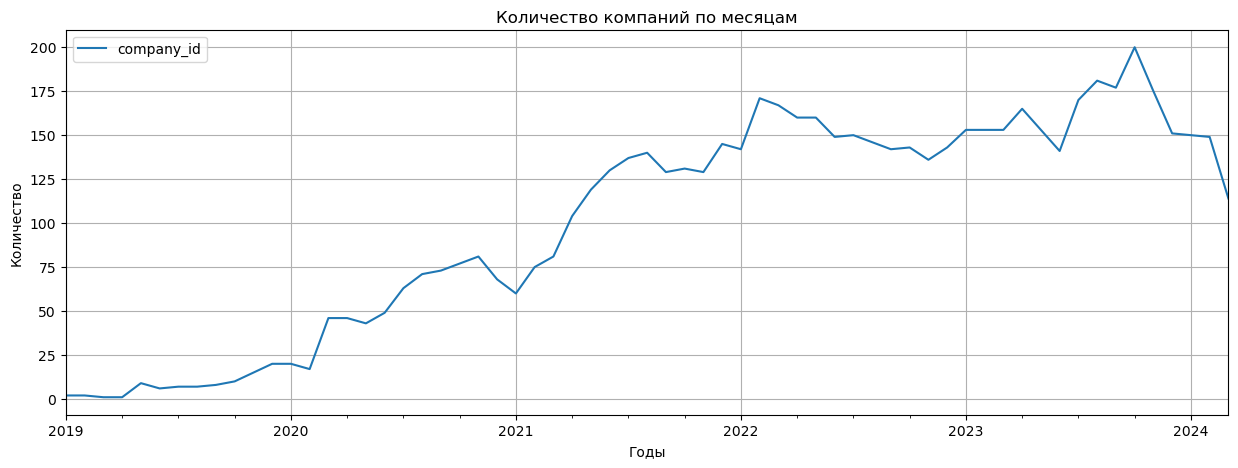

In [37]:
(
    activities
    .pivot_table(index = "month", values = "company_id", aggfunc = "count")
    .plot(grid = True, figsize = (15, 5))
)


plt.title("Количество компаний по месяцам")
plt.ylabel("Количество")
plt.xlabel("Годы")
plt.show()

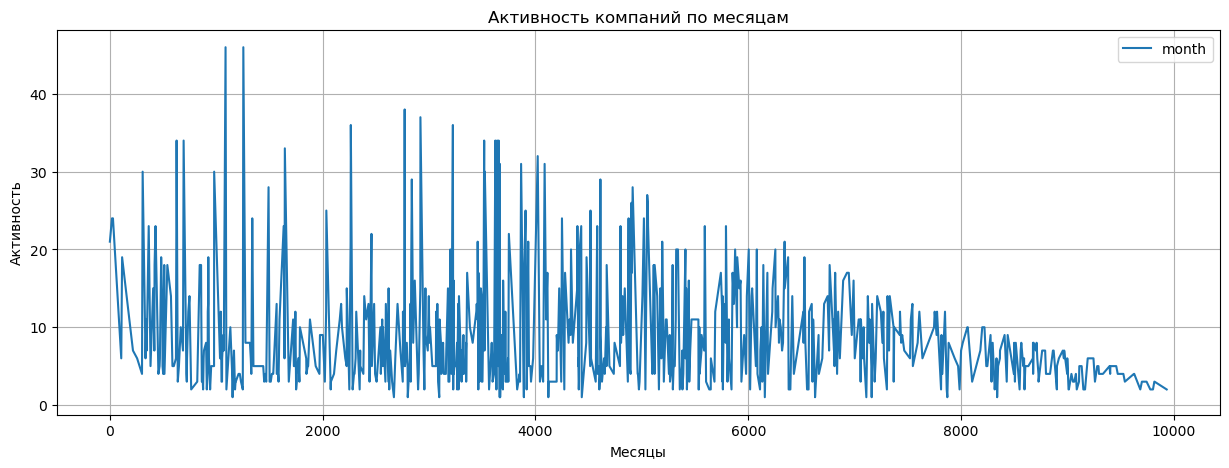

In [38]:
(
    activities
    .pivot_table(index = "company_id", values = "month", aggfunc = "count")
    .plot(grid = True, figsize = (15, 5))
)

plt.title("Активность компаний по месяцам")
plt.ylabel("Активность")
plt.xlabel("Месяцы")
plt.show()

Как видно на графиках, количество компаний, которые проявляли какую-либо активность каждый месяц начало резко снижаться с последней четверти 2023 года. Также и в целом активность компаний показывает устойчивую тенденцию к снижению.

Для удобства дальнейших исследований, объединим все таблицы в одну. Чтобы не было путанницы, столбцы с похожими названиями в разных таблицах переименуем соовтетственно дя каждой таблицы.

In [39]:
billing = billing.rename(columns = {"created_at": "created_bill",
                                    "updated_at": "updated_bill",
                                    "billing_tariff_id": "tariff plan_bill"})

In [40]:
activities_all = activities.merge(billing, on = "company_id", how = "left")

In [41]:
activities_all

,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders,id,user_id,tariff plan_bill,payed_until,is_payed,created_bill,updated_bill,billing_tariff_price_id,comment,pay_date
0,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,444,1,3,2019-12-29,False,2019-08-17,2019-12-14,10.0,NaN,1970-01-01
1,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,380,1,3,2020-11-29,True,2019-07-23,2020-07-25,9.0,NaN,1970-01-01
2,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,1132,1,3,2020-10-26,False,2020-04-21,2020-04-21,10.0,NaN,1970-01-01
3,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,1133,1,3,2021-01-26,False,2020-04-21,2020-04-21,11.0,NaN,1970-01-01
4,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,1134,1,3,2020-08-26,False,2020-04-21,2020-04-21,9.0,NaN,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21203,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,12053,11611,2,2025-03-19,False,2023-09-19,2023-09-19,24.0,NaN,1970-01-01
21204,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,12054,11611,2,2025-03-19,False,2023-09-19,2023-09-19,24.0,NaN,1970-01-01
21205,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,12130,11611,2,2025-03-26,True,2023-09-26,2023-09-26,24.0,NaN,2023-09-26
21206,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,12135,11611,2,2025-05-26,False,2023-09-26,2023-09-26,24.0,18+2,1970-01-01


In [42]:
activities_all.duplicated().sum()

0

In [43]:
companies = companies.rename(columns = {"id": "company_id"})

In [44]:
companies = companies.dropna(subset = ["billing_tariff_id"])

In [45]:
companies["billing_tariff_id"] = companies["billing_tariff_id"].astype(int)

In [46]:
companies = companies.rename(columns = {"created_at": "created_company",
                                        "updated_at": "updated_company",
                                        "billing_tariff_id": "tariff plan_company"})

In [47]:
companies.head()

,company_id,working_direction,employer_count_interval,created_company,updated_company,tariff plan_company,billing_is_over
0,514,-,1.0,2019-10-17,2022-12-06,4,True
1,383,Строительство,2.0,2019-07-26,2023-02-16,7,False
2,495,-,1.0,2019-10-08,2020-08-24,2,False
3,724,-,1.0,2020-01-20,2022-12-06,4,True
4,471,-,1.0,2019-09-24,2022-12-06,7,True


In [48]:
data = activities_all.merge(companies, on = "company_id", how = "left")

Удалим ненужные столбцы.

In [49]:
data = data.drop(["id", "user_id", "comment"], axis = 1)

В общую таблицу добавим столбец активность, показывающую сколько месяцев компания проявляла активность.

In [50]:
activity = activities.groupby("company_id")["month"].count().reset_index()
activity = activity.rename(columns = {"month": "activity"})
activity

,company_id,activity
0,1,21
1,21,24
2,30,24
3,108,6
4,116,19
...,...,...
711,9777,2
712,9802,2
713,9815,3
714,9817,3


In [51]:
data = data.merge(activity, on = "company_id", how = "left")

In [52]:
info(data)

Таблица:


,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders,tariff plan_bill,payed_until,is_payed,created_bill,updated_bill,billing_tariff_price_id,pay_date,working_direction,employer_count_interval,created_company,updated_company,tariff plan_company,billing_is_over,activity
0,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2019-12-29,False,2019-08-17,2019-12-14,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21
1,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-11-29,True,2019-07-23,2020-07-25,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21
2,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-10-26,False,2020-04-21,2020-04-21,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21
3,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2021-01-26,False,2020-04-21,2020-04-21,11.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21
4,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-08-26,False,2020-04-21,2020-04-21,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21


------------------------------------------------------------------------------------------------
Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21208 entries, 0 to 21207
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company_id                     21208 non-null  int64         
 1   month                          21208 non-null  datetime64[ns]
 2   company-month-billing          21208 non-null  float64       
 3   company-month-stocks           21208 non-null  float64       
 4   company-month-backups          21208 non-null  float64       
 5   company-month-projects         21208 non-null  float64       
 6   company-month-contractors      21208 non-null  float64       
 7   company-month-resource_orders  21208 non-null  float64       
 8   tariff plan_bill               21208 non-null  int64         
 9   payed_until                    21208 non

None

------------------------------------------------------------------------------------------------
Пропуски:


company_id                        0
month                             0
company-month-billing             0
company-month-stocks              0
company-month-backups             0
company-month-projects            0
company-month-contractors         0
company-month-resource_orders     0
tariff plan_bill                  0
payed_until                       0
is_payed                          0
created_bill                      0
updated_bill                      0
billing_tariff_price_id           0
pay_date                          0
working_direction                68
employer_count_interval           0
created_company                   0
updated_company                   0
tariff plan_company               0
billing_is_over                   0
activity                          0
dtype: int64

------------------------------------------------------------------------------------------------
Дубликаты:


201

In [53]:
data = data.drop_duplicates()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21007 entries, 0 to 21207
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company_id                     21007 non-null  int64         
 1   month                          21007 non-null  datetime64[ns]
 2   company-month-billing          21007 non-null  float64       
 3   company-month-stocks           21007 non-null  float64       
 4   company-month-backups          21007 non-null  float64       
 5   company-month-projects         21007 non-null  float64       
 6   company-month-contractors      21007 non-null  float64       
 7   company-month-resource_orders  21007 non-null  float64       
 8   tariff plan_bill               21007 non-null  int64         
 9   payed_until                    21007 non-null  datetime64[ns]
 10  is_payed                       21007 non-null  bool          
 11  created_bill        

**Профили пользователей.**

Проведём RFM-анализ. Поскольку у нас нет данных о тратах компаний, заменим этот показатель на активность. Последнюю дату покупки заменим датой последнего обновления информации о компании на сайте.

In [55]:
temp = ["company_id", "tariff plan_company", "updated_company", "activity"]
rfm_data = data[temp]
rfm_data.shape

(21007, 4)

Добавим стобец где посчитаем сколько раз обновлялась инофрмация о каждой компании.

In [56]:
frequency = rfm_data.groupby("company_id").agg({"updated_company": "count"}).reset_index()
frequency = frequency.rename(columns = {"updated_company": "frequency"})
frequency

,company_id,frequency
0,1,126
1,21,480
2,30,240
3,108,18
4,116,76
...,...,...
711,9777,4
712,9802,2
713,9815,3
714,9817,3


In [57]:
rfm_data = rfm_data.merge(frequency, on = "company_id", how = "left")

In [58]:
rfm_data.head()

,company_id,tariff plan_company,updated_company,activity,frequency
0,1,3,2022-12-06,21,126
1,1,3,2022-12-06,21,126
2,1,3,2022-12-06,21,126
3,1,3,2022-12-06,21,126
4,1,3,2022-12-06,21,126


In [59]:
rfm_data["frequency"].unique()

array([126, 480, 240,  18,  76,  14,   4, 210,   6,  33,   7, 391,   5,
        15, 253,  10, 323,  84,  25, 108,  70,  12, 680,  45, 130, 204,
         3,  54,  36,   2,  49,  24,  60,  78, 380,  30,  20, 840,   9,
       322,  40,   1,   8, 598,  52,  48,  16, 360, 336,  13,  28, 299,
       198,  11,  27, 175,  22,  39, 165,  42, 432, 169,  26,  21, 228,
       116, 222,  55,  80, 144,  50,  34,  32, 119, 238, 150,  68, 132,
        93,  64,  66, 128, 120,  85,  23,  38,  46, 125, 145,  92,  56,
        72,  17, 243, 140,  44,  35, 115,  51,  19], dtype=int64)

Дата последнего обновления в таблице.

In [60]:
data["updated_company"].max()

Timestamp('2024-03-13 00:00:00')

In [61]:
now = data["updated_company"].max()

In [62]:
now

Timestamp('2024-03-13 00:00:00')

In [63]:
rfm_table = rfm_data.groupby("company_id").agg({"updated_company": lambda x: (now - x.max()).days, 
                                                "activity": lambda x: x.sum()})

rfm_table["updated_company"] = rfm_table["updated_company"].astype(int)

rfm_table.rename(columns = {"updated_company": "recency"}, inplace = True)
rfm_table.head()

,recency,activity
company_id,,
1,463,2646
21,317,11520
30,463,5760
108,463,108
116,463,1444


In [64]:
rfm_table = rfm_table.merge(frequency, on = "company_id", how = "left")

In [65]:
rfm_table = rfm_table[["company_id", "recency", "frequency", "activity"]]
rfm_table.head()

,company_id,recency,frequency,activity
0,1,463,126,2646
1,21,317,480,11520
2,30,463,240,5760
3,108,463,18,108
4,116,463,76,1444


In [66]:
quantiles = rfm_table.quantile(q = [0.25, 0.5, 0.75])
quantiles = quantiles[["recency", "frequency", "activity"]]
quantiles

,recency,frequency,activity
0.25,170.75,4.0,16.0
0.50,453.50,10.0,64.0
0.75,463.00,23.0,242.0


In [67]:
rfm_segment = rfm_table.copy()

def r_class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [68]:
def fm_class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfm_segment["r_quartile"] = rfm_segment["recency"].apply(r_class, args = ("recency", quantiles,))
rfm_segment["f_quartile"] = rfm_segment["frequency"].apply(fm_class, args = ("frequency", quantiles,))
rfm_segment["m_quartile"] = rfm_segment["activity"].apply(fm_class, args = ("activity", quantiles,))
rfm_segment["rfm_class"] = rfm_segment.r_quartile.map(str) \
                            + rfm_segment.f_quartile.map(str) \
                            + rfm_segment.m_quartile.map(str)

In [69]:
rfm_segment

,company_id,recency,frequency,activity,r_quartile,f_quartile,m_quartile,rfm_class
0,1,463,126,2646,2,4,4,244
1,21,317,480,11520,3,4,4,344
2,30,463,240,5760,2,4,4,244
3,108,463,18,108,2,3,3,233
4,116,463,76,1444,2,4,4,244
...,...,...,...,...,...,...,...,...
711,9777,44,4,8,4,1,1,411
712,9802,14,2,4,4,1,1,411
713,9815,15,3,9,4,1,1,411
714,9817,34,3,9,4,1,1,411


**Самые активные компании.**

In [70]:
active = rfm_segment[rfm_segment["rfm_class"] == "444"].sort_values("activity", ascending = False)
active.head()

,company_id,recency,frequency,activity,r_quartile,f_quartile,m_quartile,rfm_class
87,1255,4,598,27508,4,4,4,444
154,2265,83,432,15552,4,4,4,444
73,1088,111,322,14812,4,4,4,444
212,2919,170,222,8214,4,4,4,444
279,3518,79,238,8092,4,4,4,444


In [71]:
active.shape[0]

41

**Компании на пороге ухода.**

In [72]:
outflow = rfm_segment[rfm_segment["r_quartile"] <= 2 ].sort_values("activity", ascending = False)
outflow.head()

,company_id,recency,frequency,activity,r_quartile,f_quartile,m_quartile,rfm_class
64,981,463,840,25200,2,4,4,244
12,366,463,391,8993,2,4,4,244
197,2771,534,228,8664,1,4,4,144
94,1339,463,360,8640,2,4,4,244
59,926,463,380,7220,2,4,4,244


In [73]:
outflow.shape[0]

358

**Ушедшие компании.**

In [74]:
departed = rfm_segment[rfm_segment["rfm_class"] == "111"].sort_values("recency", ascending = False)
departed.head()

,company_id,recency,frequency,activity,r_quartile,f_quartile,m_quartile,rfm_class
378,4651,763,4,16,1,1,1,111
277,3502,707,3,9,1,1,1,111
529,6552,574,2,4,1,1,1,111
537,6627,555,1,1,1,1,1,111
245,3232,485,4,16,1,1,1,111


In [75]:
departed.shape[0]

5

**Лояльные компании (те, у которых высокое количество обновлений на сайте).**

In [76]:
loyal = rfm_segment[rfm_segment["f_quartile"] >= 3 ].sort_values("activity", ascending = False)
loyal.head()

,company_id,recency,frequency,activity,r_quartile,f_quartile,m_quartile,rfm_class
87,1255,4,598,27508,4,4,4,444
64,981,463,840,25200,2,4,4,244
32,628,369,680,23120,3,4,4,344
154,2265,83,432,15552,4,4,4,444
73,1088,111,322,14812,4,4,4,444


In [77]:
loyal["rfm_class"].unique()

array(['444', '244', '344', '144', '434', '134', '334', '234', '433',
       '233', '333', '133', '243', '343', '143', '443', '232', '432',
       '332'], dtype=object)

Лояльные компании могут попадать в несколько категорий. По этой причине, возьмём только активных, уходящих и ушедшие компании.

In [78]:
loyal.shape[0]

332

In [79]:
outflow[outflow["company_id"].isin(departed["company_id"])]

,company_id,recency,frequency,activity,r_quartile,f_quartile,m_quartile,rfm_class
378,4651,763,4,16,1,1,1,111
245,3232,485,4,16,1,1,1,111
277,3502,707,3,9,1,1,1,111
529,6552,574,2,4,1,1,1,111
537,6627,555,1,1,1,1,1,111


В группу компаний на пороге ухода, попали также и ушедшие компании. Оставим только уходящих.

In [80]:
outflow = outflow[~outflow["company_id"].isin(departed["company_id"])]

In [81]:
outflow.shape[0]

353

Из проведённых рсчётов видно, что большая часть компаний находится на пороге ухода (353 компании), на втором месте идут компании, которые продолжают активно работать (41 компания) и 5 компаний можно считать окончательно ушедшими.

Присоеденим эти данные к основной таблице.

In [82]:
active = active[["company_id", "rfm_class"]]
active.head()

,company_id,rfm_class
87,1255,444
154,2265,444
73,1088,444
212,2919,444
279,3518,444


In [83]:
active["rfm_class"].unique()

array(['444'], dtype=object)

In [84]:
outflow = outflow[["company_id", "rfm_class"]]
outflow.head()

,company_id,rfm_class
64,981,244
12,366,244
197,2771,144
94,1339,244
59,926,244


In [85]:
outflow["rfm_class"].unique()

array(['244', '144', '134', '234', '233', '243', '133', '143', '223',
       '123', '232', '222', '122', '211', '221'], dtype=object)

In [86]:
departed = departed[["company_id", "rfm_class"]]
departed

,company_id,rfm_class
378,4651,111
277,3502,111
529,6552,111
537,6627,111
245,3232,111


In [87]:
len(active), len(outflow), len(departed)

(41, 353, 5)

In [88]:
len(pd.concat([active, outflow, departed]))

399

In [89]:
categories = pd.concat([active, outflow, departed])

In [90]:
categories

,company_id,rfm_class
87,1255,444
154,2265,444
73,1088,444
212,2919,444
279,3518,444
...,...,...
378,4651,111
277,3502,111
529,6552,111
537,6627,111


In [91]:
categories.duplicated().sum()

0

In [92]:
categories.duplicated(subset = ["company_id"]).sum()

0

In [93]:
data = data.merge(categories, on = "company_id", how = "left")

In [94]:
data

,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders,tariff plan_bill,payed_until,is_payed,created_bill,updated_bill,billing_tariff_price_id,pay_date,working_direction,employer_count_interval,created_company,updated_company,tariff plan_company,billing_is_over,activity,rfm_class
0,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2019-12-29,False,2019-08-17,2019-12-14,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,244
1,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-11-29,True,2019-07-23,2020-07-25,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,244
2,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-10-26,False,2020-04-21,2020-04-21,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,244
3,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2021-01-26,False,2020-04-21,2020-04-21,11.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,244
4,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-08-26,False,2020-04-21,2020-04-21,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21002,8513,2024-02-01,0.0,0.0,0.0,0.0,0.0,2.0,2,2024-09-16,True,2023-08-08,2023-08-08,8.0,2023-08-08,Строительство,1.0,2023-08-08,2023-08-08,2,False,8,NaN
21003,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,2,2025-03-19,False,2023-09-19,2023-09-19,24.0,1970-01-01,-,1.0,2023-08-21,2023-10-26,2,False,5,NaN
21004,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,2,2025-03-26,True,2023-09-26,2023-09-26,24.0,2023-09-26,-,1.0,2023-08-21,2023-10-26,2,False,5,NaN
21005,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,2,2025-05-26,False,2023-09-26,2023-09-26,24.0,1970-01-01,-,1.0,2023-08-21,2023-10-26,2,False,5,NaN


In [95]:
data["rfm_class"] = data["rfm_class"].fillna(0)

In [96]:
data["rfm_class"] = data["rfm_class"].astype(int)

Разделим компании на категории по результатам RFM-анализа.

In [97]:
def category(rfm):
    
    if rfm == 444:
        return "Активные"
    
    elif 111 < rfm < 444:
        return "Уходящие"
        
    elif rfm == 111:
        return "Ушедшие"
    
    else:
        return "Без категории"

In [98]:
data["category"] = data["rfm_class"].apply(category)

In [99]:
data = data.drop("rfm_class", axis = 1)

In [100]:
data

,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders,tariff plan_bill,payed_until,is_payed,created_bill,updated_bill,billing_tariff_price_id,pay_date,working_direction,employer_count_interval,created_company,updated_company,tariff plan_company,billing_is_over,activity,category
0,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2019-12-29,False,2019-08-17,2019-12-14,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие
1,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-11-29,True,2019-07-23,2020-07-25,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие
2,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-10-26,False,2020-04-21,2020-04-21,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие
3,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2021-01-26,False,2020-04-21,2020-04-21,11.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие
4,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-08-26,False,2020-04-21,2020-04-21,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21002,8513,2024-02-01,0.0,0.0,0.0,0.0,0.0,2.0,2,2024-09-16,True,2023-08-08,2023-08-08,8.0,2023-08-08,Строительство,1.0,2023-08-08,2023-08-08,2,False,8,Без категории
21003,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,2,2025-03-19,False,2023-09-19,2023-09-19,24.0,1970-01-01,-,1.0,2023-08-21,2023-10-26,2,False,5,Без категории
21004,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,2,2025-03-26,True,2023-09-26,2023-09-26,24.0,2023-09-26,-,1.0,2023-08-21,2023-10-26,2,False,5,Без категории
21005,8603,2023-11-01,0.0,0.0,0.0,0.0,0.0,2.0,2,2025-05-26,False,2023-09-26,2023-09-26,24.0,1970-01-01,-,1.0,2023-08-21,2023-10-26,2,False,5,Без категории


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21007 entries, 0 to 21006
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company_id                     21007 non-null  int64         
 1   month                          21007 non-null  datetime64[ns]
 2   company-month-billing          21007 non-null  float64       
 3   company-month-stocks           21007 non-null  float64       
 4   company-month-backups          21007 non-null  float64       
 5   company-month-projects         21007 non-null  float64       
 6   company-month-contractors      21007 non-null  float64       
 7   company-month-resource_orders  21007 non-null  float64       
 8   tariff plan_bill               21007 non-null  int64         
 9   payed_until                    21007 non-null  datetime64[ns]
 10  is_payed                       21007 non-null  bool          
 11  created_bill   

In [102]:
data["category"].value_counts()

category
Уходящие         10002
Без категории     6691
Активные          4300
Ушедшие             14
Name: count, dtype: int64

In [103]:
data["billing_is_over"].value_counts()

billing_is_over
True     13574
False     7433
Name: count, dtype: int64

«Без категории» -  это, судя по всему, те компании, которые не осуществляют какой-либо активной деятельности (при этом нельзя сказать, что она у них остановлена) и срок оплаты тарифа у них, как правило просрочен. Видимо это, в том числе те, которые попадают в разные категории.

In [104]:
data["year"] = data["month"].dt.to_period("Y")

In [105]:
data.head()

,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders,tariff plan_bill,payed_until,is_payed,created_bill,updated_bill,billing_tariff_price_id,pay_date,working_direction,employer_count_interval,created_company,updated_company,tariff plan_company,billing_is_over,activity,category,year
0,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2019-12-29,False,2019-08-17,2019-12-14,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019
1,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-11-29,True,2019-07-23,2020-07-25,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019
2,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-10-26,False,2020-04-21,2020-04-21,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019
3,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2021-01-26,False,2020-04-21,2020-04-21,11.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019
4,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-08-26,False,2020-04-21,2020-04-21,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019


In [106]:
companies1 = data[data["category"] != "Без категории"].groupby("category")["activity"].agg(["count", "max", "mean", "sum"]).reset_index()
companies1

,category,count,max,mean,sum
0,Активные,4300,46,29.945581,128766
1,Уходящие,10002,38,18.307938,183116
2,Ушедшие,14,4,3.285714,46


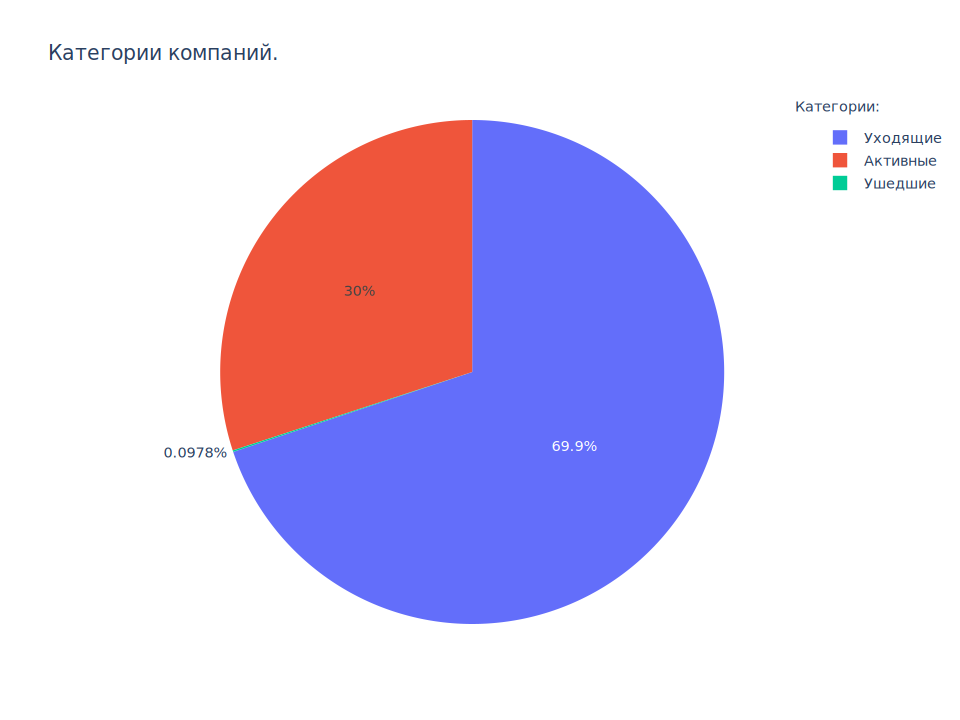

In [107]:
fig = pg.Figure(data = [pg.Pie(labels = companies1["category"],
                               values = companies1["count"])]) 
fig.update_layout(title = "Категории компаний.",
                  width = 800,
                  height = 600,
                  annotations = [dict(x = 1.12,
                                    y = 1.05,
                                    text = "Категории:",
                                    showarrow = False)])

fig.show()

Как уже было показано, большая часть компаний, это уходящие компании (69,9%).

**Предположим, что активность компании на сайте зависит от её вида деятельности.**

Посмотрим какими видами деятельности занимаются компании клиенты "Gectaro".

In [108]:
data["working_direction"].value_counts()

working_direction
-                                    10704
Строительство                         1714
Ландшафтно-строительная компания       598
Строительство домов                    522
строительство                          420
                                     ...  
ФАСАДЫ ОСТЕКЛЕНИЕ                        2
Агрегатор элитных ремонтов               2
Наружные сети, бетонные работы           2
строительная компания (тест)             2
-Отделочные работы МОП, ТЦ, Офисы        2
Name: count, Length: 169, dtype: int64

In [109]:
data["working_direction"].nunique()

169

In [110]:
data.isna().sum()

company_id                        0
month                             0
company-month-billing             0
company-month-stocks              0
company-month-backups             0
company-month-projects            0
company-month-contractors         0
company-month-resource_orders     0
tariff plan_bill                  0
payed_until                       0
is_payed                          0
created_bill                      0
updated_bill                      0
billing_tariff_price_id           0
pay_date                          0
working_direction                68
employer_count_interval           0
created_company                   0
updated_company                   0
tariff plan_company               0
billing_is_over                   0
activity                          0
category                          0
year                              0
dtype: int64

In [111]:
data = data.dropna(subset = ["working_direction"])

In [112]:
def direction (row):
    if "Строитель" in row or "строитель" in row:
        return "Строительство"
    elif "Ремонт" in row or "ремонт" in row or "Отдел" in row or "отдел" in row :
        return "Ремонтные и отделочные работы"
    else:
        return "Другое"

In [113]:
data["type_of_activity"] = data["working_direction"].apply(direction)

In [114]:
data.head()

,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders,tariff plan_bill,payed_until,is_payed,created_bill,updated_bill,billing_tariff_price_id,pay_date,working_direction,employer_count_interval,created_company,updated_company,tariff plan_company,billing_is_over,activity,category,year,type_of_activity
0,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2019-12-29,False,2019-08-17,2019-12-14,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019,Строительство
1,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-11-29,True,2019-07-23,2020-07-25,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019,Строительство
2,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-10-26,False,2020-04-21,2020-04-21,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019,Строительство
3,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2021-01-26,False,2020-04-21,2020-04-21,11.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019,Строительство
4,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-08-26,False,2020-04-21,2020-04-21,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019,Строительство


In [115]:
data["type_of_activity"].value_counts()

type_of_activity
Другое                           11799
Строительство                     6863
Ремонтные и отделочные работы     2277
Name: count, dtype: int64

Посмотрим как виды деятельности распределяются по категорим компаний.

In [116]:
type_of_activity = data[["category", "type_of_activity"]]
type_of_activity["activity"] = type_of_activity["type_of_activity"]
type_of_activity =  data.pivot_table(index = "category", columns = "type_of_activity", values = "activity", aggfunc = "count").reset_index()
type_of_activity

type_of_activity,category,Другое,Ремонтные и отделочные работы,Строительство
0,Активные,1705,374,2170
1,Без категории,3920,333,2421
2,Уходящие,6167,1567,2268
3,Ушедшие,7,3,4


In [117]:
activity =  data[data["category"] != "Без категории"].groupby(["category", "type_of_activity"])["company_id"].count().reset_index()
activity.columns = ["category", "type_of_activity", "count"]
activity.sort_values(by = "count", ascending = False)
activity

,category,type_of_activity,count
0,Активные,Другое,1705
1,Активные,Ремонтные и отделочные работы,374
2,Активные,Строительство,2170
3,Уходящие,Другое,6167
4,Уходящие,Ремонтные и отделочные работы,1567
5,Уходящие,Строительство,2268
6,Ушедшие,Другое,7
7,Ушедшие,Ремонтные и отделочные работы,3
8,Ушедшие,Строительство,4


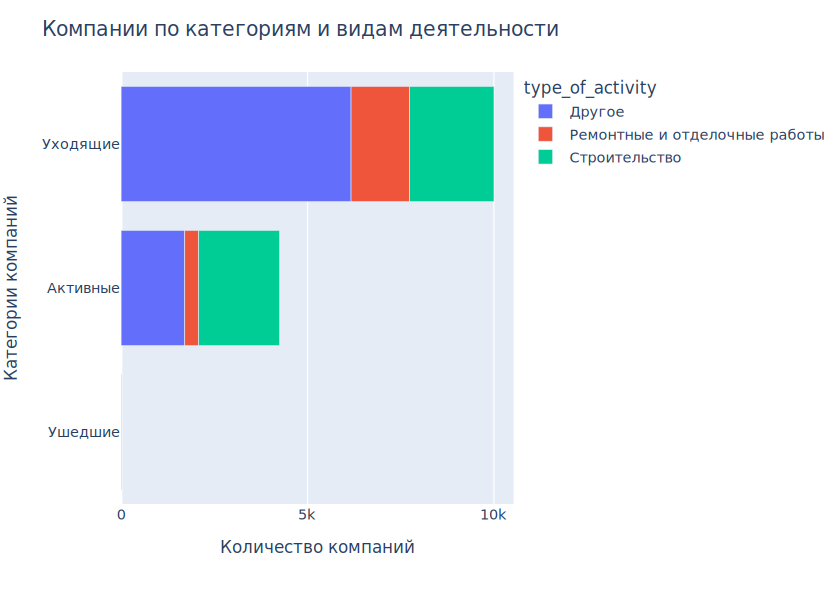

In [118]:
fig = px.bar(activity, 
             x = "count", 
             y = "category",                    
             color = "type_of_activity"
            )

fig.update_layout(title = "Компании по категориям и видам деятельности",
                   xaxis_title = "Количество компаний",
                   yaxis_title = "Категории компаний",
                   yaxis = {"categoryorder":"total ascending"}
                 )
fig.show()

Как видно на графике, соотношение по видам деятельности сохраняется для всех категорий компаний.<br>
**Соответственно, нет оснований утверждать, что вид деятельности может быть связан с активностью компании на сайте.**

**Посмотрим, чем характеризуются показатели и активность компаний разных категорий в динамике.**

Посчитаем суммарные показатели компаний разных категорий.

In [119]:
type_of_activity1 =  data[data["category"] != "Без категории"].groupby("category")[["company-month-billing", "company-month-stocks", "company-month-backups", "company-month-projects", "company-month-contractors", "company-month-resource_orders"]].sum().reset_index()
type_of_activity1

,category,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
0,Активные,1218.0,68588.0,9362.0,68000.0,53113.0,89055.0
1,Уходящие,6455.0,104116.0,11105.0,103237.0,58956.0,76113.0
2,Ушедшие,10.0,18.0,0.0,16.0,23.0,27.0


In [120]:
data["indicators"] = data[["company-month-billing", "company-month-stocks", "company-month-backups", "company-month-projects", "company-month-contractors", "company-month-resource_orders"]].sum(axis = 1)
data.head()

,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders,tariff plan_bill,payed_until,is_payed,created_bill,updated_bill,billing_tariff_price_id,pay_date,working_direction,employer_count_interval,created_company,updated_company,tariff plan_company,billing_is_over,activity,category,year,type_of_activity,indicators
0,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2019-12-29,False,2019-08-17,2019-12-14,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019,Строительство,8.0
1,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-11-29,True,2019-07-23,2020-07-25,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019,Строительство,8.0
2,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-10-26,False,2020-04-21,2020-04-21,10.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019,Строительство,8.0
3,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2021-01-26,False,2020-04-21,2020-04-21,11.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019,Строительство,8.0
4,1,2019-09-01,1.0,0.0,0.0,7.0,0.0,0.0,3,2020-08-26,False,2020-04-21,2020-04-21,9.0,1970-01-01,строительство,3.0,2019-01-23,2022-12-06,3,True,21,Уходящие,2019,Строительство,8.0


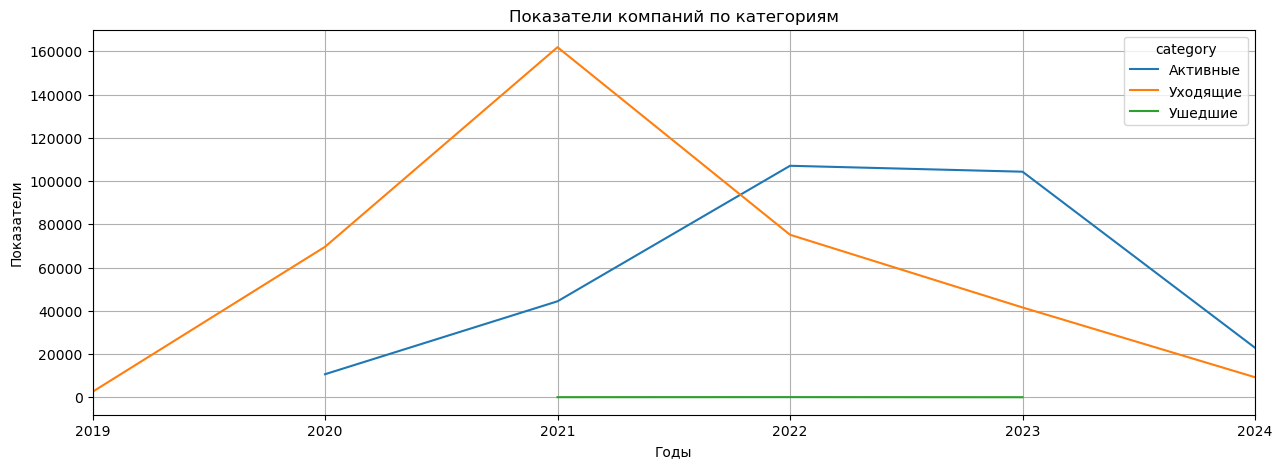

In [121]:
(
    data[data["category"] != "Без категории"]
    .pivot_table(index = "year", columns = "category", values = "indicators", aggfunc = "sum")
    .plot(grid = True, figsize = (15, 5))
)

plt.title("Показатели компаний по категориям")
plt.ylabel("Показатели")
plt.xlabel("Годы")
plt.show()

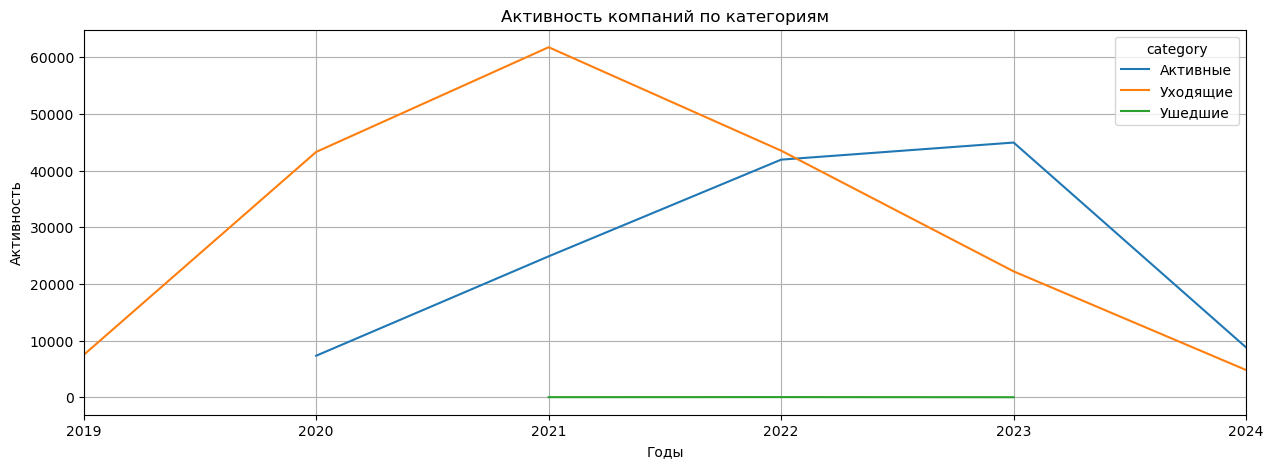

In [122]:
(
    data[data["category"] != "Без категории"]
    .pivot_table(index = "year", columns = "category", values = "activity", aggfunc = "sum")
    .plot(grid = True, figsize = (15, 5))
)

plt.title("Активность компаний по категориям")
plt.ylabel("Активность")
plt.xlabel("Годы")
plt.show()

**Вывод:**<br>
Как видно из результатов исследований, компании начали уходить с сайта начиная с 2021 года. До этого наблюдался рост количества компаний, которые были на грани ухода, с 2021 года начался их спад (перешли в "Ушедшие"). При этом нужно отметить, что рост количества уходящих компаний несколько замедлился в 2020 году и в это же время появляются компании, которые можно отнести к категории "Активные". Это может свидетельствовать о переходе части компаний из категории "Уходящие" в активные. При этом активные компании показывают стабльные показатели и рост на протяжении всего периода (за 2024 год данные не полные, поэтому наблюдается провал). Тем не менее, большинство компаний относятся к категории "Уходящие" и есть риск их перехода в ушедшие.<br>
Учитывая, что перелом показателей произошёл в 2021 году можно предположить наличие каких-либо проблем в работе портала либо изменение в правилах его работы произошедшие в это время.<br>
**P.S. К сожалению, для анализа было предоставлено мало данных; в основном информация о счетах и количестве складов, заказов, контрагентов, проектов компаний. Именно это считается активностью компании и именно этот показатель был использован в качестве основного при анализе деятельности компании. Также была предоставлена информация о тарифных планах, используемых компаниями, и об их сотрудниках. Данная информация, по нашему мнению, не представляла ценности для данного исследования. Для более полного и достоверного исследования понадобились бы более полные данные о деятельности компаний: например, из каких регионов эти компании, информацию о количестве денег, которое компания потратила на портале (напрямую или опосредованно, например, заключив посредством его сделку) и т.д. По причине остутствия такой информации, выводы и рекомендации сделаны только на основании имеющихся, на наш взгляд недостаточных, данных.**

**Рекомендации:**<br>
Необходимо проанализировать работу портала, возможные изменения в правилах пользования им, а также изменения в тарифах в период с 2020 г. по 2021 г. Предположительно, уход компаний может быть связан именно с этими возможными изменениями, т.к. компании начинают уходить именно с 2021 года.

**Ссылка на презентацию:**<br>
https://disk.yandex.ru/i/laV2pr48Zsptag